## Preprocessing of Audio data

## Download Dataset

Source : https://voice.mozilla.org/en/datasets

In [1]:
!wget https://voice-prod-bundler-ee1969a6ce8178826482b88e843c335139bd3fb4.s3.amazonaws.com/cv-corpus-3/ga-IE.tar.gz # Irish dataset

--2019-11-06 17:18:23--  https://voice-prod-bundler-ee1969a6ce8178826482b88e843c335139bd3fb4.s3.amazonaws.com/cv-corpus-3/ga-IE.tar.gz
Resolving voice-prod-bundler-ee1969a6ce8178826482b88e843c335139bd3fb4.s3.amazonaws.com (voice-prod-bundler-ee1969a6ce8178826482b88e843c335139bd3fb4.s3.amazonaws.com)... 52.218.220.123
Connecting to voice-prod-bundler-ee1969a6ce8178826482b88e843c335139bd3fb4.s3.amazonaws.com (voice-prod-bundler-ee1969a6ce8178826482b88e843c335139bd3fb4.s3.amazonaws.com)|52.218.220.123|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98312781 (94M) [application/octet-stream]
Saving to: ‘ga-IE.tar.gz’

ga-IE.tar.gz        100%[===================>]  93.76M  27.7MB/s    in 3.4s    

2019-11-06 17:18:32 (27.7 MB/s) - ‘ga-IE.tar.gz’ saved [98312781/98312781]



In [0]:
!mkdir /content/Irish
!tar -C /content/Irish -xf /content/ga-IE.tar.gz

## Explore dataset

In [0]:
# let's listen to a few audios
import IPython
import os
import numpy as np 

#IPython.display.Audio("/content/Chinese/clips/common_voice_zh-CN_18718143.mp3")
#IPython.display.Audio("/content/Italian/clips/common_voice_it_18017190.mp3")

## Preprocessing

We use sampling to extract the information from audio files, with sampling frequency of 8000 Hz. 
- For succesfull reconstruction of input signal from the sampled signal, the sampling frequency must be greater than 2 times the max frequency of the audio input signal. Hence 8000 Hz is a sweet spot for most of our audio input files.

These sampled frequencies are then combined to form a spectogram, which serve as input to our models.

In [3]:
!pip install pydub

In [0]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from scipy.io import wavfile
import os
import pandas as pd
from pydub import AudioSegment

# Source : Coursera Sequence Models Course

#Calculate and plot spectogram from passed in file
def graph_spectrogram(audio, rate, plot=False):
    nfft = 200 # Length of each window segment
    fs = 8000 # Sampling frequency
    noverlap = 120 # Overlap between windows
    nchannels = audio.ndim
    fig = plt.figure()
    if nchannels == 1:
        pxx, freqs, bins, im = plt.specgram(audio, nfft, fs, noverlap = noverlap)
    elif nchannels == 2:
        pxx, freqs, bins, im = plt.specgram(audio[:,0], nfft, fs, noverlap = noverlap)
    if not plot:    
        plt.close(fig)
    return pxx

# Load a wav file
def get_wav_info(wav_file):
    ''' Returns the sampling rate and data of wav file '''
    rate, data = wavfile.read(wav_file)
    return rate, data

(101, 2648)
Frequency Tranformation of audio file


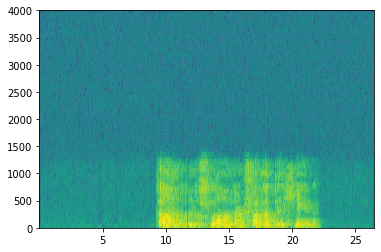

In [10]:
def convert_to_wav(save_folder, mp3_file, new_file):
    ''' converts mp3 audio to wav format'''
    mp3_file = AudioSegment.from_mp3(mp3_file)
    wav_path = os.path.join(save_folder, new_file)
    mp3_file.export(wav_path, format='wav')


save_folder = "/content"
mp3_file = "/content/Irish/clips/common_voice_ga-IE_17358885.mp3"
new_file = "irish_1.wav"
convert_to_wav(save_folder, mp3_file, new_file)

wav_path = "/content/irish_1.wav"
wav_file = AudioSegment.from_wav(wav_path)  # Load wav file
rate, data = get_wav_info(wav_path) # Extract sampling rate, and data
audio = np.array(wav_file.get_array_of_samples())
audio_sample = audio.reshape(-1, wav_file.channels)
x = graph_spectrogram(audio_sample, rate, plot=True)    # plot spectogram

print(x.shape)
print('Frequency Tranformation of audio file')